In [1]:
import scanpy as sc
import anndata as ad
import os

In [2]:
# DATA_PATH="../../data/simulated/Synthetic_2000/dyn-SW/dyn-SW-2000-2/"
# DATA_PATH="../../data/simulated/Synthetic_1000/dyn-BFStrange/dyn-BFStrange-1000-1/"
# DATA_PATH="../../data/simulated/Synthetic_10k/dyn-BFStrange/dyn-BFStrange-10000-1/"
DATA_PATH="../../data/simulated/Synthetic_10k/dyn-SW/dyn-SW-10000-1/"
# DATA_PATH="/home/stephenz/stephenz/locaTE-paper/data/simulated/BoolODE/Curated/mCAD/mCAD-1000-2/"
adata = ad.read_h5ad(os.path.join(DATA_PATH, "anndata.h5ad"))

In [15]:
sc.tl.leiden(adata, resolution = 100)
sc.tl.paga(adata)

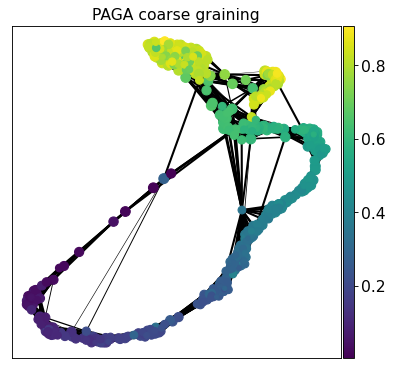

In [17]:
sc.set_figure_params(figsize = (5, 5))
sc.pl.paga(adata, color ="dpt", edge_width_scale = 0.25, labels = ["" for i in adata.obs.leiden.cat.categories], layout = "fa",
           title = "PAGA coarse graining", save = "switch_paga_layout")

In [18]:
adata.write_h5ad(os.path.join(DATA_PATH, "anndata_paga.h5ad"))

In [387]:
import nimfa
import numpy as np
nmf = nimfa.Nmf(adata.X.T, rank = 5)
nmf_fit = nmf()

(-0.5, 4.5, 999.5, -0.5)

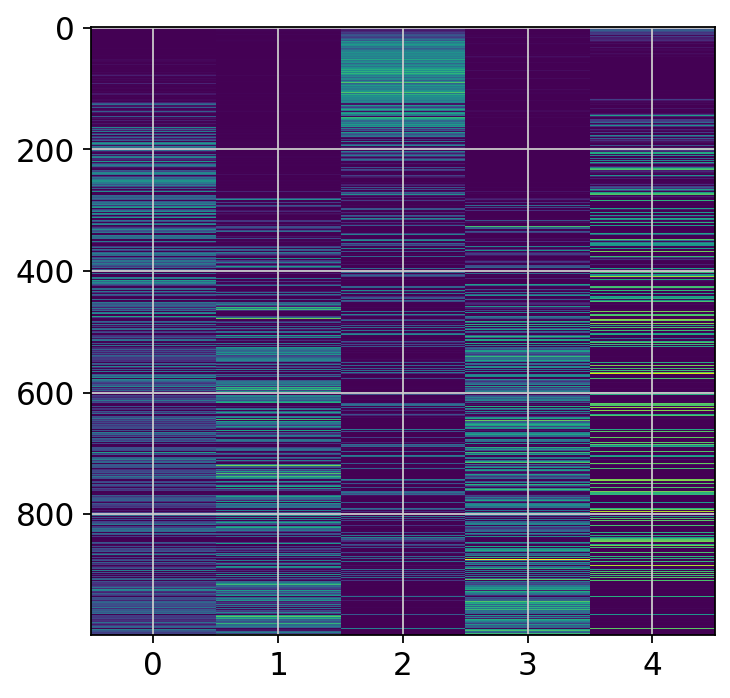

In [388]:
plt.imshow(nmf_fit.coef().T[np.argsort(adata.obs.dpt), :], interpolation = "none")
plt.axis("auto")

In [389]:
adata.obs.leiden

E160_118    58
E854_226    30
E967_269     9
E252_192    36
E122_147    15
            ..
E421_75     29
E484_72     64
E322_256    48
E152_123    68
E687_408    13
Name: leiden, Length: 1000, dtype: category
Categories (109, object): ['0', '1', '2', '3', ..., '105', '106', '107', '108']